In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/email_spam_indo.csv')

In [ ]:
df.describe()

,Kategori,Pesan
count,2636,2636
unique,2,2620
top,spam,Re: Presentasi ALP FYI Vince - - - - - - - - -...
freq,1368,2


In [ ]:
df.head(5)

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [ ]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2636 non-null   object
 1   Pesan     2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


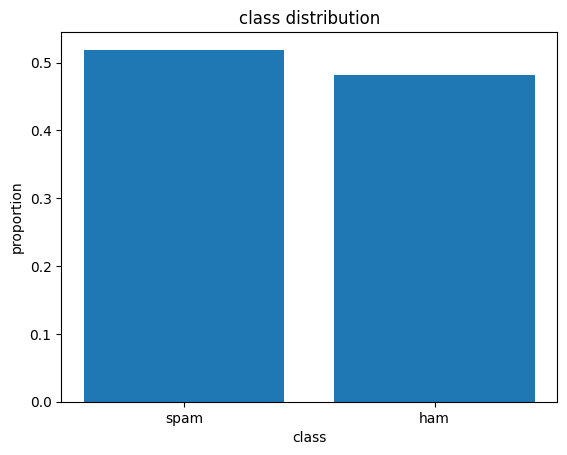

In [ ]:
class_counts = df['Kategori'].value_counts()
class_proportion = class_counts/len(df)

plt.bar(class_proportion.index, class_proportion.values)
plt.xlabel('class')
plt.ylabel('proportion')
plt.title('class distribution')
plt.show()

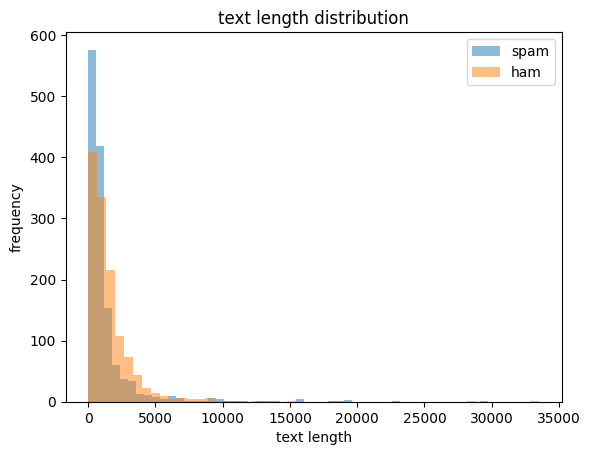

In [ ]:
df['text_length'] = df['Pesan'].apply(len)
spam_length =  df[df['Kategori'] == 'spam']['text_length']
ham_length = df[df['Kategori'] == 'ham']['text_length']

plt.hist(spam_length, bins=50, alpha=0.5, label='spam')
plt.hist(ham_length, bins=50, alpha=0.5, label='ham')
plt.xlabel('text length')
plt.ylabel('frequency')
plt.title('text length distribution')
plt.legend()
plt.show()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.isnull().sum()

Kategori       0
Pesan          0
text_length    0
dtype: int64

In [ ]:
df=df.dropna(subset='Pesan')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Pesan'])

sequences = tokenizer.texts_to_sequences(df['Pesan'])

max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Kategori'])

In [ ]:
df.isnull().sum()

Kategori       0
Pesan          0
text_length    0
label          0
dtype: int64

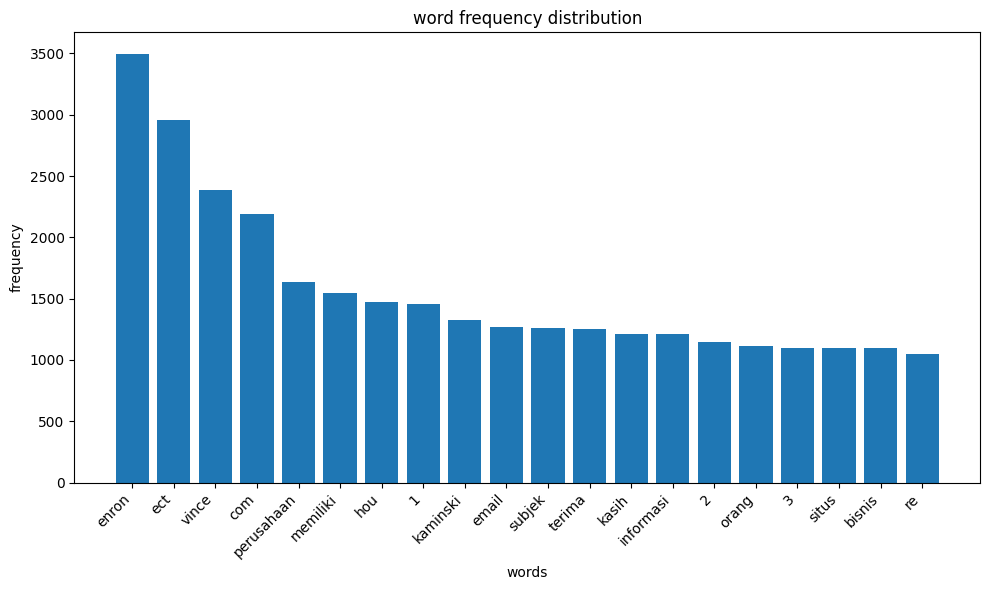

In [ ]:
word_freq = Counter()
stop_words = list(set(stopwords.words('indonesian')))

for text in df['Pesan']:
  tokens = word_tokenize(text)
  filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
  word_freq.update(filtered_tokens)
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.bar(words, frequencies)
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('word frequency distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

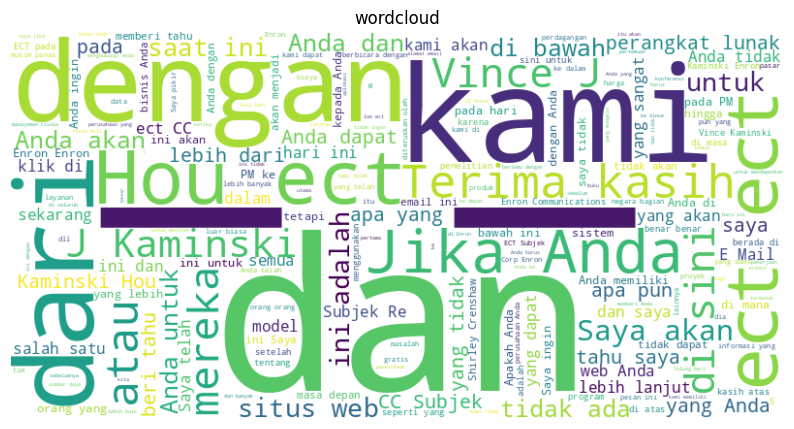

In [ ]:
text_combined = ' '.join(df['Pesan'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('wordcloud')
plt.axis('off')
plt.show()

In [ ]:
from nltk.util import ngrams

In [ ]:
text_combined = ' '.join(df['Pesan'].astype(str))
tokens = text_combined.split()
n = 2
ngram_counts = Counter(ngrams(tokens, n))
most_common_ngrams = ngram_counts.most_common(20)
for ngram, count in most_common_ngrams:
  print(' '.join(ngram), count)

- - 26432
_ _ 13788
* * 2195
? ? 2073
/ / 1645
. . 1465
/ ect 1210
ect @ 1011
Hou / 935
/ Hou 932
= = 821
http: / 787
Jika Anda 721
situs web 628
di sini 617
@ ect, 582
Vince J 570
J Kaminski 562
Anda akan 551
Anda untuk 511


In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_sentiment(text):
  blob = TextBlob(str(text))
  sentiment_polarity = blob.sentiment.polarity
  if sentiment_polarity < 0:
    return 'Negative'
  elif sentiment_polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['sentiment'] = df['Pesan'].apply(analyze_sentiment)
print(df[['Pesan', 'sentiment']])

                                                  Pesan sentiment
0     Secara alami tak tertahankan identitas perusah...   Neutral
1     Fanny Gunslinger Perdagangan Saham adalah Merr...   Neutral
2     Rumah -rumah baru yang luar biasa menjadi muda...   Neutral
3     4 Permintaan Khusus Pencetakan Warna Informasi...  Negative
4     Jangan punya uang, dapatkan CD perangkat lunak...   Neutral
...                                                 ...       ...
2631  Pengingat halo semuanya: Vince telah meminta s...   Neutral
2632  Re: Argentina Power & Gas Market Modeling Oke ...  Negative
2633  Re: Program Enron / Stanford Stinson, hebat! S...   Neutral
2634  Persetujuan untuk peninjau Roberts JR, Michael...  Negative
2635  Re: Seminar Bollerslev sangat bagus. Terima ka...   Neutral

[2636 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, tokenizer=word_tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Pesan'])

feature_names = tfidf_vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

print(df_tfidf.head())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


          !    #        $         %         &    '   ''   '.  '00  '11  ...  \
0  0.000000  0.0  0.00000  0.008887  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
1  0.000000  0.0  0.00000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
2  0.000000  0.0  0.08583  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
3  0.073078  0.0  0.00000  0.000000  0.061508  0.0  0.0  0.0  0.0  0.0  ...   
4  0.076634  0.0  0.00000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...   

   ​​kepada  ​​maya  ​​motion  ​​salam  ​​saya  ​​terra  ​​tidak  ​​untuk  \
0       0.0     0.0       0.0      0.0     0.0      0.0      0.0      0.0   
1       0.0     0.0       0.0      0.0     0.0      0.0      0.0      0.0   
2       0.0     0.0       0.0      0.0     0.0      0.0      0.0      0.0   
3       0.0     0.0       0.0      0.0     0.0      0.0      0.0      0.0   
4       0.0     0.0       0.0      0.0     0.0      0.0      0.0      0.0   

   ​​yang    ”  
0     0.0  0.0  
1     0.0  0.0  
2     0.0  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df['Kategori'], test_size=0.3, random_state=42)

In [ ]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Accuracy: 0.9785082174462706
Classification Report:
               precision    recall  f1-score   support

         ham    0.98425   0.97150   0.97784       386
        spam    0.97317   0.98519   0.97914       405

    accuracy                        0.97851       791
   macro avg    0.97871   0.97834   0.97849       791
weighted avg    0.97858   0.97851   0.97850       791



[[375  11]
 [  6 399]]


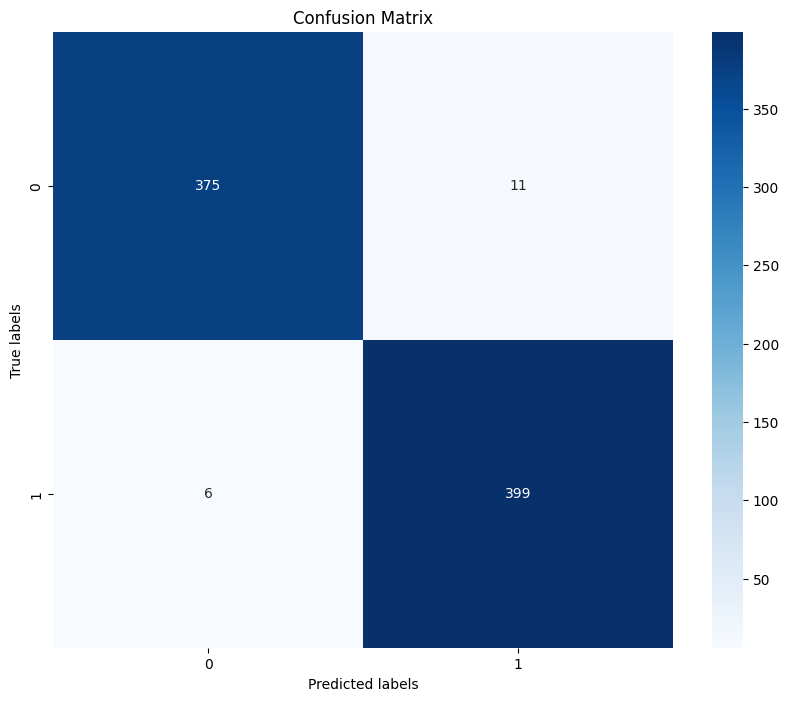

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Accuracy: 0.97724399494311
Classification Report:
               precision    recall  f1-score   support

         ham    0.98421   0.96891   0.97650       386
        spam    0.97080   0.98519   0.97794       405

    accuracy                        0.97724       791
   macro avg    0.97751   0.97705   0.97722       791
weighted avg    0.97735   0.97724   0.97724       791



[[374  12]
 [  6 399]]


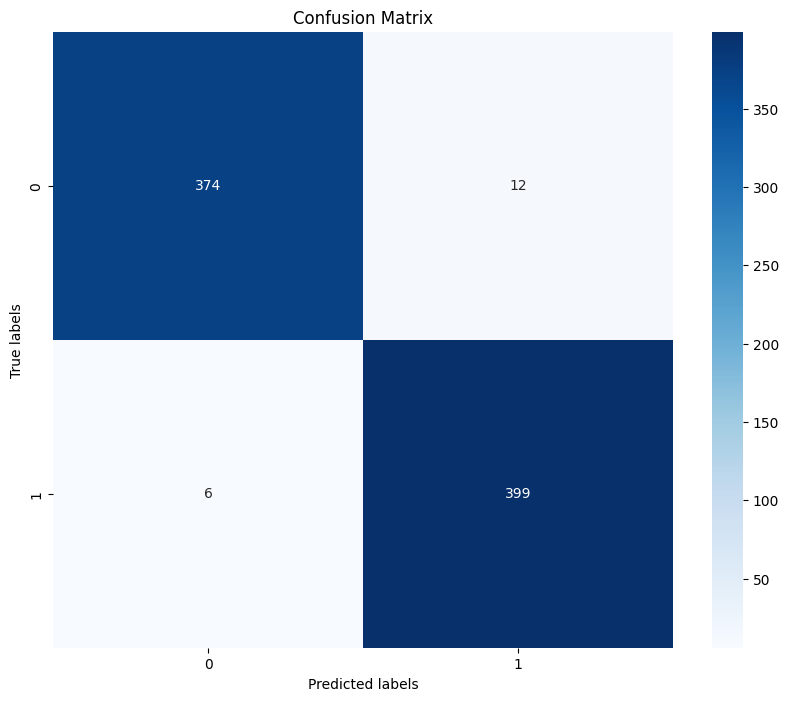

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.3, random_state=42)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_vector_length, input_length=max_sequence_length))  # Adjusted input_length
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=64)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/20
29/29 [==============================] - 13s 277ms/step - loss: 0.6458 - accuracy: 0.6336
Epoch 2/20
29/29 [==============================] - 8s 282ms/step - loss: 0.2466 - accuracy: 0.9458
Epoch 3/20
29/29 [==============================] - 8s 291ms/step - loss: 0.0703 - accuracy: 0.9810
Epoch 4/20
29/29 [==============================] - 7s 254ms/step - loss: 0.0519 - accuracy: 0.9886
Epoch 5/20
29/29 [==============================] - 8s 282ms/step - loss: 0.0308 - accuracy: 0.9962
Epoch 6/20
29/29 [==============================] - 8s 279ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 7/20
29/29 [==============================] - 8s 270ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 8/20
29/29 [==============================] - 8s 281ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 9/20
29/29 [==============================] - 8s 260ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 10/20
29/29 [==============================] - 8s 267ms/step - loss: 0.0015 - accuracy: 1.000

25/25 [==============================] - 1s 47ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.97927   0.97927   0.97927       386
           1    0.98025   0.98025   0.98025       405

    accuracy                        0.97977       791
   macro avg    0.97976   0.97976   0.97976       791
weighted avg    0.97977   0.97977   0.97977       791

Confusion Matrix:
[[378   8]
 [  8 397]]


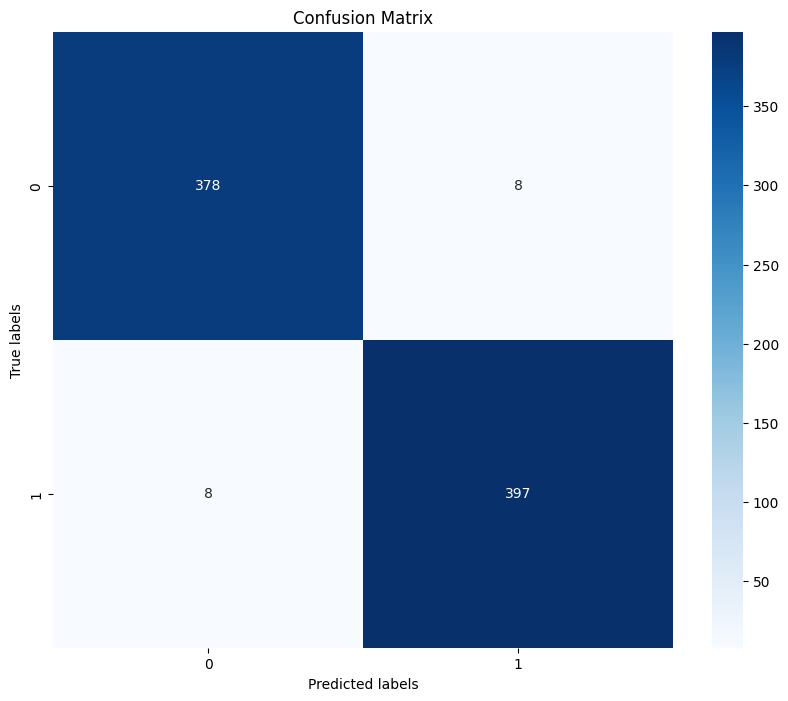

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=5))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
